# PHYS 481 Assignment 5: Monte Carlo Methods 1

### Author 1 (30114124) Aki
### Author 2 (30133483) Yuwan
### Author 3 (30154399) Christian
### Author 4 (30133957) Hayden

## Introduction

This assignment analyses and applies the Monte Carlo method through various problems to test probability outcomes. From a game show in the probability of guessing the right door and the probability of how many people share the same birthday. In addition, study Monte Carlo sampling to estimate the volume of hypersphere and hypercube of various dimensions. 

In [25]:
# Load standard libraries for numerical methods and plotting.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1

In [26]:
import random
import math

def gameshow(num_trials):
    '''
    Simulate the Monty Carlo problem through a game show for a specified number of trials. Host_choice and other_door are
    created through list comprehension. The list iterates through the numbers of doors and appended to the list if the 
    following conditions are met. Keep track of the number of wins of sticking and changing the answers and return. 
    '''
    changeW = 0  # number of wins for the contestant who changes their guess
    stickW = 0  # number of wins for the contestant who sticks with their original guess

    for i in range(num_trials):
        # simulate the game
        prize_door = 1  # the prize is behind door 1
        guess = random.randint(1, 3)  # contestant's initial guess
  
        # determines the host's choice of doors to open through list comprehension.
        host_choice = [door for door in range(1, 4) if door != guess and door != prize_door]
        host_opens = random.choice(host_choice)

        #determine the other door to choose for the contestant who changes their guess through list comprehension.
        other_door = [door for door in range(1, 4) if door != guess and door != host_opens][0]

        # updates the wins
        if guess == prize_door:
            stickW += 1
        elif other_door == prize_door:
            changeW += 1

    return stickW, changeW

# obtain stick and change wins
num_trials = 100000
stick_wins, change_wins = gameshow(num_trials)

# calculate probabilities
probability_stick = stick_wins / num_trials
probability_change = change_wins / num_trials 

# calculate standard errors
u_stick = math.sqrt(probability_stick * (1 - (probability_stick / num_trials)) / num_trials)
u_change = math.sqrt(probability_change * (1 - (probability_change / num_trials)) / num_trials)

print(f"Probability of winning by sticking with the initial guess: {(probability_stick*100):.0f}%")
print(f"Standard Uncertainty for sticking: {u_stick:.4f}")
print(f"Probability of winning by changing the guess: {(probability_change*100):.0f}%")
print(f"Standard Uncertainty for changing: {u_change:.4f}")

Probability of winning by sticking with the initial guess: 34%
Standard Uncertainty for sticking: 0.0018
Probability of winning by changing the guess: 66%
Standard Uncertainty for changing: 0.0026


Based on the results, the probability of changing should acquire more wins than that of sticking. This is because the contestant is covering more area of acquiring the right answer. By sticking with their original anwser then the less likely they can cover more area of guessing the right door, limiting their chances. Overall, coded outcomes mostly agrees with our intuition. In terms of uncertainty, for the most part these values make sense. Since it's a low number we can confidently confirm that our code and probability runs well and accurately. 

## Q2

Text(0, 0.5, 'probabilities of at least two of them share the same BD')

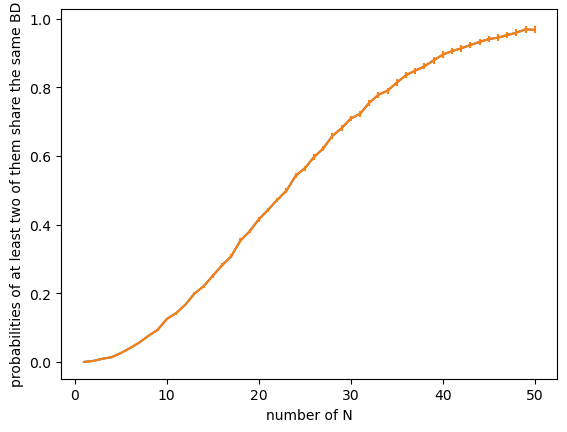

In [19]:
import random
import matplotlib.pyplot as plt

from numba import jit

@jit(nopython=True)
def birthday_problem(num_trials, N):
    shared_birthday_count = 0

    for i in range(num_trials):
        birthdays = [random.randint(1, 366) for i in range(N)]
        if len(birthdays) != len(set(birthdays)):
            shared_birthday_count += 1

    probability = shared_birthday_count / num_trials
    uncertainty =(shared_birthday_count**(1/2)) / num_trials
    return probability,uncertainty

# Number of simulations and group size
num_simulations = 10000
prob_N=[]
error=[]
N=[]
for i in range(1,51):
    prob, uncertainty =birthday_problem(num_simulations,i)
    N.append(i)
    prob_N.append(prob)
    error.append(uncertainty)
plt.figure()
plt.plot(N,prob_N)
plt.errorbar(N, prob_N, yerr=error)
plt.xlabel("number of N")
plt.ylabel("probabilities of at least two of them share the same BD")

## Q3

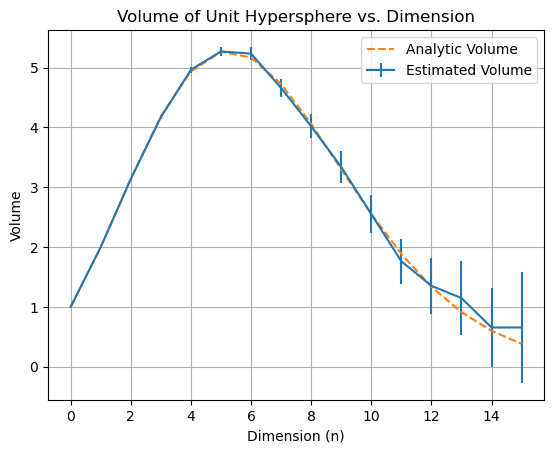

In [24]:
def estimate(n, num_samples):
    '''
    Estimate the volume of a unit hypersphere of dimension n using Monte Carlo sampling. Determines whether the generated points remain
    within the unit hyperspace to return the estimated hyperspace volume. The parameters take in "n," the dimension of the hypersphere 
    for which the volume is estimated. As well, "num_samples," the number of random samples (Monte Carlo iterations) to generate for 
    the estimation. Returns an estimation of the volume of the unit hypersphere for the given dimension 'n'.
    '''
    inside = 0  # keep track of the number of points that fall inside the hyperspace

    # loop through, generate random points, check whether they are insde the hyperspace
    for i in range(num_samples):
        # generates a random point in the hyperspace in the range from -1 to 1
        point = [random.uniform(-1, 1) for a in range(n)] 
        distance = math.sqrt(sum(x ** 2 for x in point)) # determine the distace from the origin to the point

        # determine if the distance is within the hypersphere
        if distance <= 1:
            inside += 1

    # return estimated hypersphere volume
    return (inside / num_samples) * (2 ** n)


def analytic(n):
    '''
    Calculate the volume of a unit hypersphere in 'n' dimensions analytically. This function provides the analytic result for the volume
    of a unit hypersphere in 'n' dimensions based on the provided recursive formula. Returns the analytical estimation of the volume of 
    a unit hypersphere in 'n' dimensions.
    '''
    if n == 0:
        return 1
    elif n == 1:
        return 2
    else:
        return (2 * math.pi / n) * analytic(n - 2)

# number of Monte Carlo iterations for each simulation
iterations = 100000

# lists to store results
dimensions = list(range(16))
estimated_volumes = []
error_bars = []
analytic_volumes = []

# perform simulation for different dimensions
for n in dimensions:
    # obtain estimated and analytic volumes
    estimated_volume = estimate(n, iterations)
    estimated_volumes.append(estimated_volume)
    analytic_volumes.append(analytic(n))
    
    # calculate the standard deviation for error bars
    error = (1 / iterations) * (estimated_volume * (2 ** n) - estimated_volume ** 2)
    error_bars.append(2 * math.sqrt(error))  # times by two to create a margin around the estimated volume to represent uncertainty

# create the plot
plt.errorbar(dimensions, estimated_volumes, yerr=error_bars, label="Estimated Volume")
plt.plot(dimensions, analytic_volumes, label="Analytic Volume", linestyle='--')
plt.xlabel("Dimension (n)")
plt.ylabel("Volume")
plt.title("Volume of Unit Hypersphere vs. Dimension")
plt.legend()
plt.grid()
plt.show()

As the number of dimensions increases, there creates more uncertainty (increasing error bars) for the estimate results. The increase in dimension makes our Monte Carlo method lack efficiency and produces more uncertainty. As well, an increase in dimension causes a decreasing volume unit hyperspace. Overall, the comparsion between the estimate and the analytical are accuarte before passing dimension 10. The error bars are increasing in uncertatinty as dimension increases, therefore a better uncertainty method is required for dimensions greater than dimension 10. 

## Q4a

In [8]:
def r(x):
    '''
    Calculate the radius 𝑟 in n dimensions as √∑𝑥𝑖² for a given point x in n-dimensional space. 
    Returns the radius 𝑟 for the given point x.
    '''
    return np.sqrt(np.sum(x**2))  # √∑𝑥𝑖²

def monte_integrate(dimensions, num_samples, function):
    '''
    Perform Monte Carlo integration to estimate the integral of 𝑟(𝑥𝑖) over the unit hypercube for multiple dimensions.
    Returns a list of lists: A table containing results for each dimension, including dimension, integral estimate, 
    and standard uncertainty.
    '''
    # store dimensions, estimate, and uncertainty
    results = []
    
    for n in dimensions:
        # generate n-dimensional random points within the unit hypercube
        random_points = np.random.rand(num_samples, n)
        
        # calculate the function r(x) at these points
        r_values = np.apply_along_axis(function, 1, random_points)
        estimate = np.mean(r_values)  # calculate the average value of r(x)
        
        # calculate the standard uncertainty
        uncertainty = np.std(r_values) / np.sqrt(num_samples)
        
        # check if the standard uncertainty is less than 0.1% of the value
        assert uncertainty < 0.001 * estimate

        # store the results in the table
        results.append((n, estimate, uncertainty))
    
    return results

# setting initial conditions 
num_samples = 1000000  # number of Monte Carlo samples
dimensions = [3, 4, 10, 100]  # dimensions to evaluate

# obtain results
results = monte_integrate(dimensions, num_samples, r)

# display the results as a table
print("Dimension | Integral Estimate | Standard Uncertainty")
for result in results:
    print(f"{result[0]:^9} | {result[1]:^17.5f} | {result[2]:^20.5f}")

Dimension | Integral Estimate | Standard Uncertainty
    3     |      0.96070      |       0.00028       
    4     |      1.12212      |       0.00027       
   10     |      1.80643      |       0.00026       
   100    |      5.76795      |       0.00026       


## Q4b

In [29]:
def r(x):
    '''
    Calculate the radius 𝑟 in n dimensions as √∑𝑥𝑖² for a given point x in n-dimensional space. 
    Returns the radius 𝑟 for the given point x.
    '''
    return np.sqrt(np.sum(x**2))  # √∑𝑥𝑖²

def monte_integrate(dimensions, num_samples, function):
    '''
    Perform Monte Carlo integration to estimate the integral of 𝑟(𝑥𝑖) over the unit hypercube for multiple dimensions.
    Returns a list of lists: A table containing results for each dimension, including dimension, integral estimate, 
    and standard uncertainty.
    '''
    # store dimensions, estimate, and uncertainty
    results = []
    
    for n in dimensions:
        # generate n-dimensional random points within the unit hypercube
        random_points = np.random.uniform(0, 2, size=(num_samples, n))
        
        # calculate the function r(x) at these points
        r_values = np.apply_along_axis(function, 1, random_points)
        estimate = np.mean(r_values) * 2 # calculate the average value of r(x)
        
        # calculate the standard uncertainty
        uncertainty = np.std(r_values) / np.sqrt(num_samples)
        
        # check if the standard uncertainty is less than 0.1% of the value
        assert uncertainty < 0.001 * estimate

        # store the results in the table
        results.append((n, estimate, uncertainty))
    
    return results

# setting initial conditions 
num_samples = 1000000  # number of Monte Carlo samples
dimensions = [3, 4, 10, 100]  # dimensions to evaluate

# obtain results
results = monte_integrate(dimensions, num_samples, r)

# display the results as a table
print("Dimension | Integral Estimate | Standard Uncertainty")
for result in results:
    print(f"{result[0]:^9} | {result[1]:^17.5f} | {result[2]:^20.5f}")

Dimension | Integral Estimate | Standard Uncertainty
    3     |      3.84251      |       0.00056       
    4     |      4.48940      |       0.00055       
   10     |      7.22409      |       0.00053       
   100    |     23.07091      |       0.00052       


## Q4c

As dimensionality increases the grid points required for numerical integration will increase. The number of grid points grows significantly with the increasing dimensions. This would hinder how fast and effective the program can run to the point where it would be impractical. In higher dimensions, a regular grid may leave areas of the integration that are left unsampled. This leads to inaccurate estimates. 

# Conclusions

In conclusion, we have simulate the Monte Carlo method through various of ways. In Q1, the outcome was expected that the probability of changing is higher than sticking. By sticking with their original anwser then the less likely they can cover more area of guessing the right door, limiting their chances. As well, the uncertainties are low so we can be confident in our results. In Q2, the outcome as interesting as the line increases with the more people sharing the same birthday. In Q3, as the number of dimensions increases, there creates more uncertainty (increasing error bars) for the estimate results. The increase in dimension makes our Monte Carlo method lack efficiency and produces more uncertainty. As well, an increase in dimension causes a decreasing volume unit hyperspace. In Q4, we used Monete Carlo integration of the specific function given. We found that our results are fine due to the uncertainties being low. However, as dimensionality increases with conventional integrations then the more grid points are required. This creates slow and inefficient computation. 